In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Stock Headlines.csv', encoding = 'ISO-8859-1')

### **Data Preprocessing and Cleaning**

In [3]:
dataset.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",Hammers hand Robson a youthful lesson,Saints party like it's 1999,Wear wolves have turned into lambs,Stump mike catches testy Gough's taunt,Langer escapes to hit 167,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,A tale of two tails,I say what I like and I like what I say,"Elbows, Eyes and Nipples",Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United (England),Women in record South Pole walk,Vasco da Gama (Brazil),South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,"Our choice, not theirs",Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",Met faces fresh attack on race crime,Everton fans top racist 'league of shame',"Our breasts, ourselves",Russia's new boss has an extremely strange his...,Always and forever,Most everywhere: UDIs,Most wanted: Chloe lunettes,

In [4]:
dataset.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

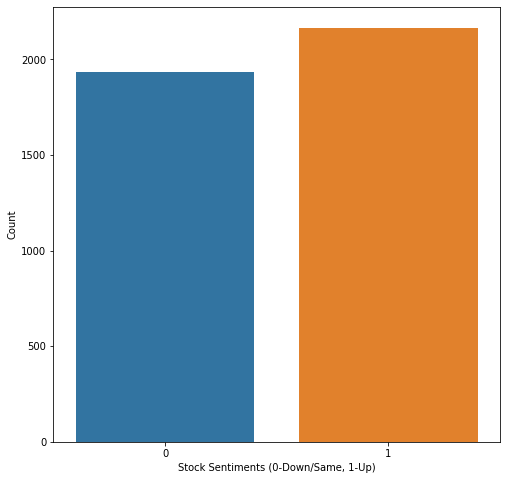

In [5]:
plt.figure(figsize=(8,8))
sns.countplot(x='Label', data=dataset)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

In [6]:
dataset.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [7]:
dataset.shape

(4101, 27)

Since there are a maximum of 7 rows which might be affected out of the 4101 rows available,we can use the dropna method.

In [8]:
dataset.dropna(inplace=True)
dataset.shape

(4098, 27)

### **Splitting Data into Train and Test Sets**

In [9]:
dataset.shape

(4098, 27)

In [10]:
dataset[dataset['Date'] < '20140101'].shape

(3720, 27)

In [11]:
dataset[dataset['Date'] > '20131231'].shape

(630, 27)

In [12]:
train = dataset[dataset['Date'] < '20140101']
test = dataset[dataset['Date'] > '20131231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (3720, 27), Test size: (630, 27)


In [13]:
train.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [14]:
y_train = train['Label']
train = train.iloc[:, 2:]
y_test = test['Label']
test = test.iloc[:, 2:]

In [15]:
train.columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

**Cleaning Stock Headlines Data**

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns

In [18]:
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

train_headlines = []
test_headlines = []

for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))

for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [19]:
ps = PorterStemmer()
train_corpus = []
test_corpus = []

for i in range(0, len(train_headlines)):
  words = train_headlines[i].lower()
  words = train_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  train_corpus.append(headline)

for i in range(0, len(test_headlines)):
  words = test_headlines[i].lower()
  words = test_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  test_corpus.append(headline)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()
X_test = cv.transform(test_corpus).toarray()

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("---- Confusion Matrix ----")
print(cm)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Confusion Matrix ----
[[175 124]
 [ 64 267]]
---- Scores ----
Accuracy score is: 70.16%
Precision score is: 0.68
Recall score is: 0.81


In [28]:
import re

def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)

In [29]:
from random import randint

In [30]:
sample_test = dataset[dataset['Date'] > '20131231']
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [31]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Iran this week unveiled a monument to Jewish soldiers killed in the Iran-Iraq War, which lasted from 1980 to 1988 and saw both countries suffer millions of casualties and billions of dollar in damage. Jewish community leaders and a number of Iranian religious officials took part in the ceremony.
Prediction: The stock price will remain the same or will go down.


In [32]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Pope Francis has called for greater transparency in politics and said elections should be free from backers who fund campaigns in order to prevent policy being influenced by wealthy sponsors.
Prediction: The stock price will go up!


In [33]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: The solar system appears to have a new ninth planet. Today, two scientists announced evidence that a body nearly the size of Neptunebut as yet unseenorbits the sun every 15,000 years.
Prediction: The stock price will go up!
